# BTC Time Series Data Forecasting

In [29]:
# import libaries
import numpy as np
import pandas as pd 
import pandas_datareader.data as pdr
#define start and end dates for our pull data
import datetime
# display the limits on columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
# seaborn and matplotlib for visualization 
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn.mertics for evaluation
from sklearn.metrics import mean_squared_error

In [12]:
# collecting data 
btc = pdr.get_data_yahoo(["BTC-USD"], start = datetime.datetime(2019, 1, 1), end = datetime.datetime(2022, 8, 19))["Close"]

In [13]:
# preview of data 
btc.tail()

Symbols,BTC-USD
Date,
2022-08-16,23883.291016
2022-08-17,23335.998047
2022-08-18,23212.738281
2022-08-19,20877.552734
2022-08-20,21166.060547


In [14]:
# saving the data as csv
btc.to_csv("newbtc.csv")

In [6]:
# load the data from csv file
data = pd.read_csv("newbtc.csv")
data.head()

,Date,BTC-USD
0,2019-01-01,3843.520020
1,2019-01-02,3943.409424
2,2019-01-03,3836.741211
3,2019-01-04,3857.717529
4,2019-01-05,3845.194580


In [7]:
# data types
data.dtypes

Date        object
BTC-USD    float64
dtype: object

In [8]:
# convert column date from object to datetime
data["Date"] = pd.to_datetime(data["Date"], format = '%Y-%m-%d')


In [9]:
# confirm the datatypes
data.dtypes

Date       datetime64[ns]
BTC-USD           float64
dtype: object

In [10]:
# set date to dataframe index
data.index = data["Date"]

In [11]:
# dropping the date column 
del data["Date"]

In [12]:
# preview of our dataframe 
data.head()

,BTC-USD
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580


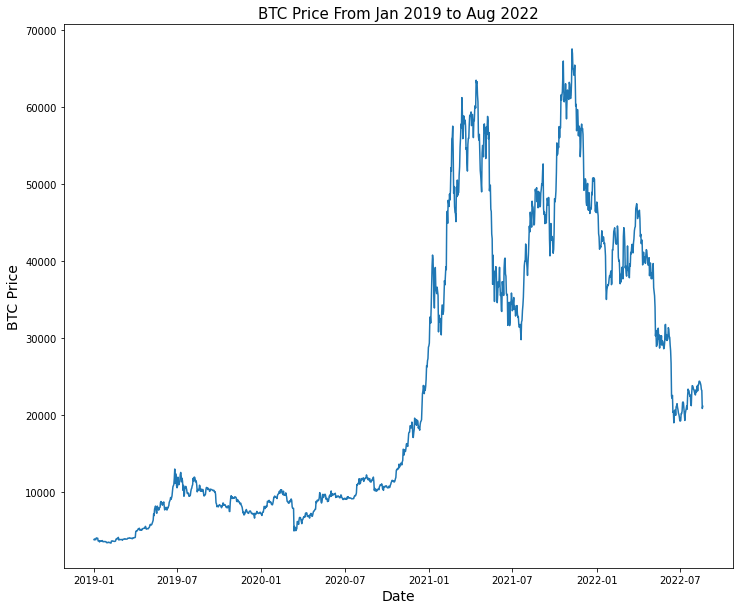

In [13]:
# plot the time series data 
ax, bar = plt.subplots(figsize=(12,10))
bar = plt.plot(data.index, data["BTC-USD"])
# labeling the axes
plt.xlabel("Date", fontsize=14)
plt.ylabel("BTC Price", fontsize=14)
# title 
plt.title("BTC Price From Jan 2019 to Aug 2022", fontsize = 15)
# display 
plt.show()

## Time Series Modelling 

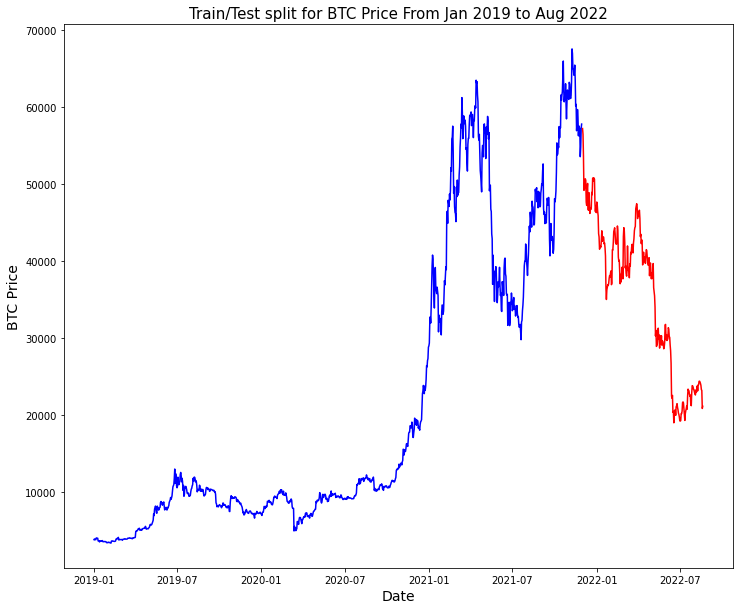

In [14]:
# splitting Data for training and testing 
train = data[data.index < pd.to_datetime("2021-11-30", format = '%Y-%m-%d')]
test = data[data.index > pd.to_datetime("2021-11-30", format = '%Y-%m-%d')]

# visual of the training and test data 
ax, bar = plt.subplots(figsize=(12,10))
bar = plt.plot(train, color = "blue")
bar = plt.plot(test, color = "red")
# labeling the axes
plt.xlabel("Date", fontsize=14)
plt.ylabel("BTC Price", fontsize=14)
# title 
plt.title("Train/Test split for BTC Price From Jan 2019 to Aug 2022", fontsize = 15)
# Display 
plt.show()

## Autoregressive Moving Average(ARMA)

In [43]:
# import the ARMA model using SARIMAX package
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
# define out input 
y = train["BTC-USD"]

In [45]:
# create the model 
ARMA_model = SARIMAX(y, order = (1, 0, 1))

/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [46]:
# fit our model 
ARMA_model = ARMA_model.fit()

/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64766D+02    |proj g|=  7.50092D+02

At iterate    5    f=  1.18318D+01    |proj g|=  5.96126D+00

At iterate   10    f=  8.76681D+00    |proj g|=  2.64964D-01

At iterate   15    f=  8.47879D+00    |proj g|=  8.02140D-02

At iterate   20    f=  8.44673D+00    |proj g|=  7.87770D-04

At iterate   25    f=  8.44402D+00    |proj g|=  6.73458D-04

At iterate   30    f=  8.44381D+00    |proj g|=  5.04592D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [47]:
# generate our predictions 
y_pred = ARMA_model.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMA_model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_output = y_pred_df["Predictions"]

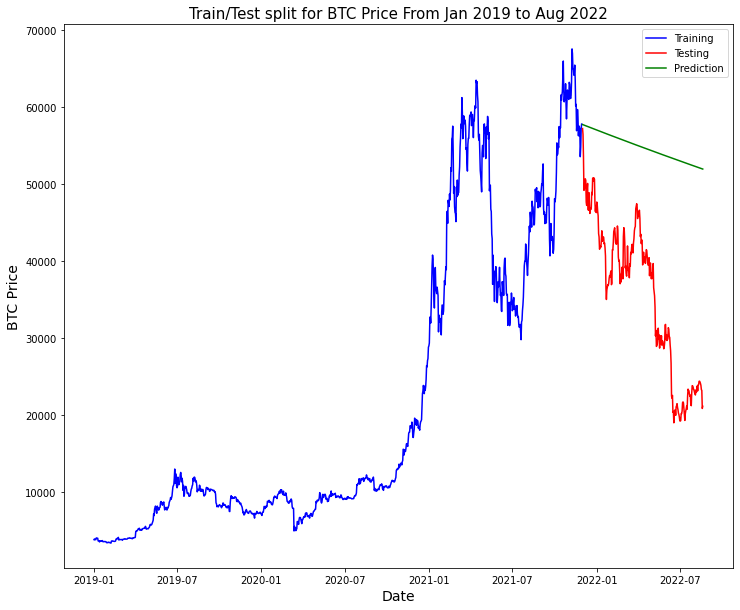

In [60]:
# visuals of the prediction results
ax, bar = plt.subplots(figsize=(12,10))
bar = plt.plot(train, color = "blue", label = "Training")
bar = plt.plot(test, color = "red", label = "Testing")
bar = plt.plot(y_pred_output, color = "Green", label = "Prediction")
plt.legend()
# labeling the axes
plt.xlabel("Date", fontsize=14)
plt.ylabel("BTC Price", fontsize=14)
# title 
plt.title("Train/Test split for BTC Price From Jan 2019 to Aug 2022", fontsize = 15)
# Display 
plt.show()


In [49]:
# evaluate the performance 
arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print(f"RMSE: {arma_rmse}")

RMSE: 21041.47948702335


## Autoregressive Integrated Moving Average(ARIMA)

In [56]:
# importing ARIMA package from stats library 
from statsmodels.tsa.arima.model import ARIMA

* ARIMA tast has three parameters.
* First Parameter corresponds to lagging which refers to the past values.
* The second parameter corresponds to differecing which refers to what makes non-stationary data stationary.
* The final parameter corresponds to white noise which is for modeling shock events.

In [91]:
# create the ARIMA model order parameter (2,2,2)
ARIMAmodel = ARIMA(y, order = (2, 1, 0))

/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [92]:
# fit the model 
ARIMAmodel = ARIMAmodel.fit()

In [93]:
# do the predictions
y_pred_arima = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05)
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"]

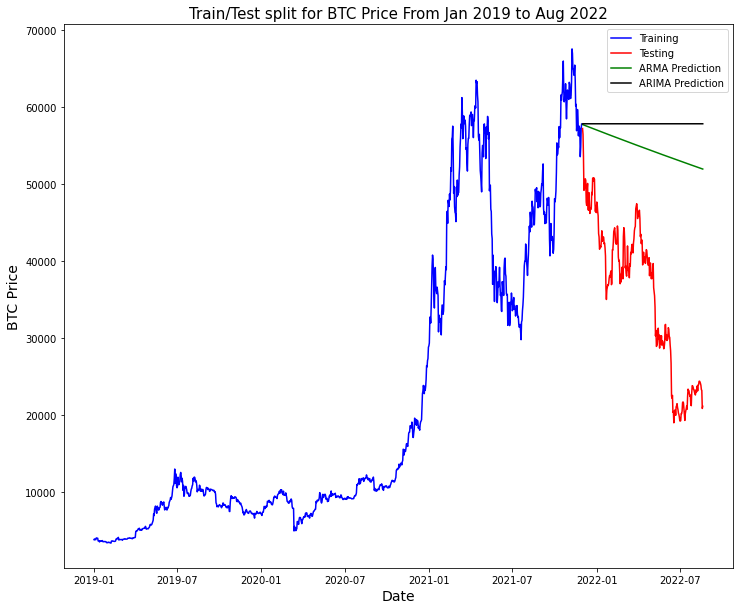

In [94]:
# visuals of the prediction results
ax, bar = plt.subplots(figsize=(12,10))
bar = plt.plot(train, color = "blue", label = "Training")
bar = plt.plot(test, color = "red", label = "Testing")
bar = plt.plot(y_pred_output, color = "Green", label = "ARMA Prediction")
bar = plt.plot(y_pred_out_arima, color = "black", label = "ARIMA Prediction")

plt.legend()
# labeling the axes
plt.xlabel("Date", fontsize=14)
plt.ylabel("BTC Price", fontsize=14)
# title 
plt.title("Train/Test split for BTC Price From Jan 2019 to Aug 2022", fontsize = 15)
# Display 
plt.show()

In [95]:
# evaluate the performance 
arima_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df_arima["Predictions"]))
print(f"RMSE: {arima_rmse}")

RMSE: 24417.035959567336


## Seasonal ARIMA (SARIMA)

In [96]:
# creating the model
SARIMAXmodel = SARIMAX(y, order = (2, 1, 0), seasonal_order=(2, 2, 2, 12 ))


/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [97]:
# fit the model
SARIMAXmodel = SARIMAXmodel.fit()

/home/muiko/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88545D+00    |proj g|=  2.02160D-01

At iterate    5    f=  8.80880D+00    |proj g|=  9.57162D-03

At iterate   10    f=  8.80816D+00    |proj g|=  1.70283D-03

At iterate   15    f=  8.80032D+00    |proj g|=  2.39784D-02

At iterate   20    f=  8.79384D+00    |proj g|=  3.48347D-03

At iterate   25    f=  8.79279D+00    |proj g|=  3.09578D-03

At iterate   30    f=  8.79252D+00    |proj g|=  2.74026D-04

At iterate   35    f=  8.79227D+00    |proj g|=  5.28411D-03

At iterate   40    f=  8.69197D+00    |proj g|=  3.01416D-01

At iterate   45    f=  8.55472D+00    |proj g|=  1.10994D-02


/home/muiko/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  8.45674D+00    |proj g|=  2.75425D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     0     0   2.754D-02   8.457D+00
  F =   8.4567396508782711     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [98]:
# do the predictions
y_pred_sarima = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]

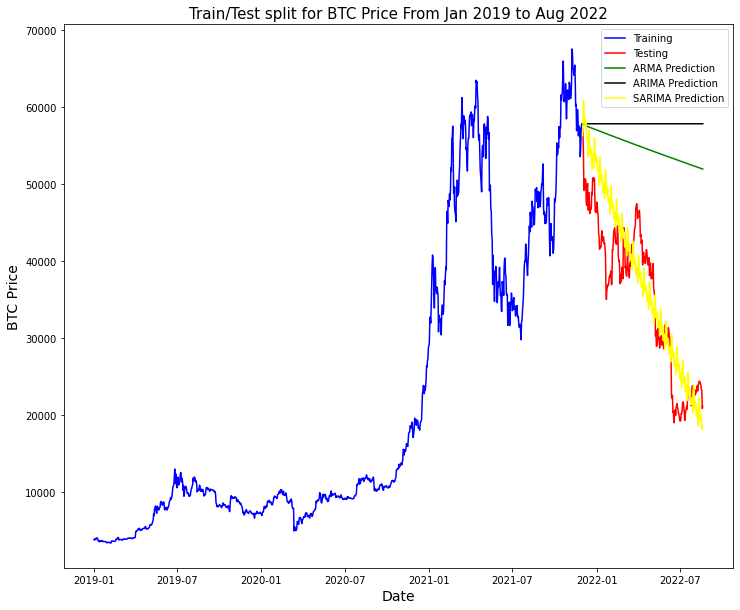

In [99]:
# visuals of the prediction results
ax, bar = plt.subplots(figsize=(12,10))
bar = plt.plot(train, color = "blue", label = "Training")
bar = plt.plot(test, color = "red", label = "Testing")
bar = plt.plot(y_pred_output, color = "Green", label = "ARMA Prediction")
bar = plt.plot(y_pred_out_arima, color = "black", label = "ARIMA Prediction")
bar = plt.plot(y_pred_out_sarima, color = "yellow", label = "SARIMA Prediction")

plt.legend()
# labeling the axes
plt.xlabel("Date", fontsize=14)
plt.ylabel("BTC Price", fontsize=14)
# title 
plt.title("Train/Test split for BTC Price From Jan 2019 to Aug 2022", fontsize = 15)
# Display 
plt.show()

In [100]:
# evaluate the performance 
sarima_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df_sarima["Predictions"]))
print(f"RMSE: {sarima_rmse}")

RMSE: 5516.628835140087
